In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


# **Decision Tree for Iris Dataset**

Confusion Matrix:
[[14  0  0]
 [ 0 10  1]
 [ 0  0  5]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

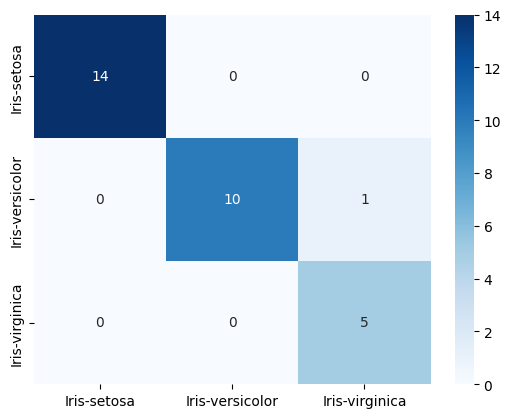

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

Confusion Matrix:
[[14  0  0]
 [ 0 10  1]
 [ 0  0  5]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

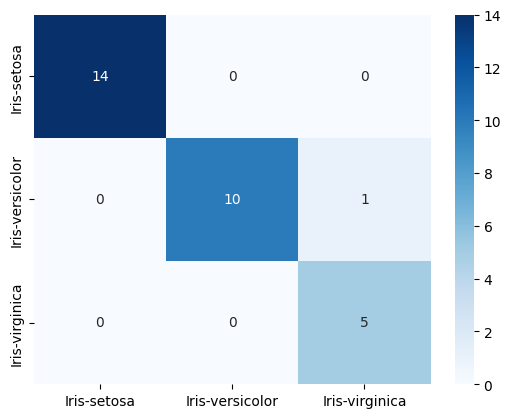

In [6]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=10)
classifier.fit(X_train, y_train)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import plot_tree

In [8]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



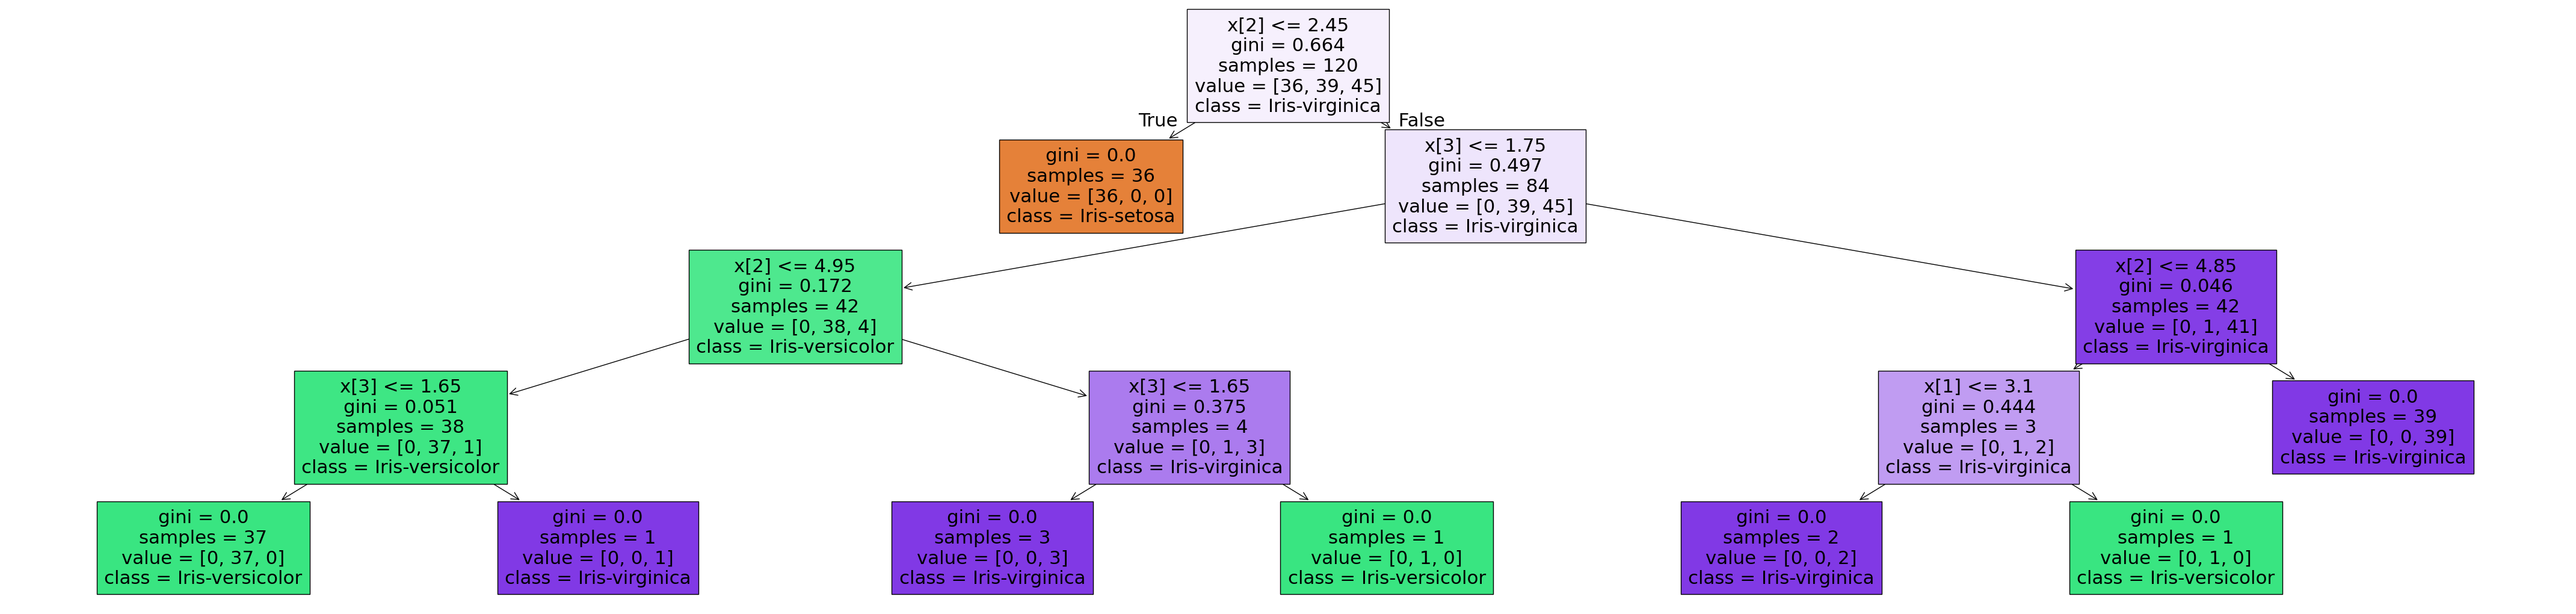

In [9]:
fig = plt.figure(figsize=(55,13))
_= tree.plot_tree(decision_tree=classifier,
                   feature_names=iris.columns,
                   class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                   filled=True)

In [10]:
#Classification MultinomialNB

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[14  0  0]
 [ 0  1 10]
 [ 0  0  5]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.09      0.17        11
 Iris-virginica       0.33      1.00      0.50         5

       accuracy                           0.67        30
      macro avg       0.78      0.70      0.56        30
   weighted avg       0.89      0.67      0.61        30



<Axes: >

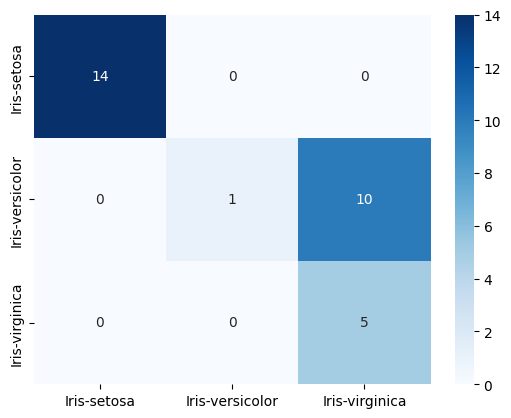

In [11]:
#evaluation of classifier performance

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


In [12]:
#Classification GaussianNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[14  0  0]
 [ 0 11  0]
 [ 0  1  4]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.97        30
      macro avg       0.97      0.93      0.95        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

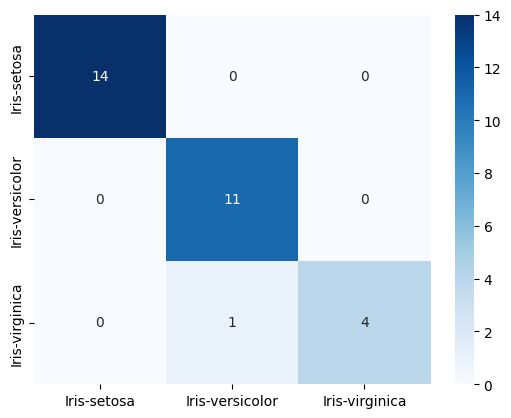

In [13]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [16]:
#Classification BernoulliNB

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 0  0 14]
 [ 0  0 11]
 [ 0  0  5]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        14
Iris-versicolor       0.00      0.00      0.00        11
 Iris-virginica       0.17      1.00      0.29         5

       accuracy                           0.17        30
      macro avg       0.06      0.33      0.10        30
   weighted avg       0.03      0.17      0.05        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
#Naive Bayes classification for multinomial models:

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, fit_prior = False, class_prior = None).fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14  0  0]
 [ 0 10  1]
 [ 0  1  4]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.80      0.80      0.80         5

       accuracy                           0.93        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.93      0.93      0.93        30



In [20]:
#Naive Bayes classification for multinomial models:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(priors=None, var_smoothing=1e-05).fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14  0  0]
 [ 0 11  0]
 [ 0  1  4]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.97        30
      macro avg       0.97      0.93      0.95        30
   weighted avg       0.97      0.97      0.97        30



In [22]:
#Naive Bayes classification for multinomial models:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior = None).fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 0  0 14]
 [ 0  0 11]
 [ 0  0  5]]
------------------------------------------
------------------------------------------
Performance Evaluation:
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        14
Iris-versicolor       0.00      0.00      0.00        11
 Iris-virginica       0.17      1.00      0.29         5

       accuracy                           0.17        30
      macro avg       0.06      0.33      0.10        30
   weighted avg       0.03      0.17      0.05        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
#Breast Cancer Dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
#Classification MultinomialNB

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[74  1]
 [13 26]]
------------------------------------------
------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.85      0.99      0.91        75
           M       0.96      0.67      0.79        39

    accuracy                           0.88       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.88      0.87       114



<Axes: >

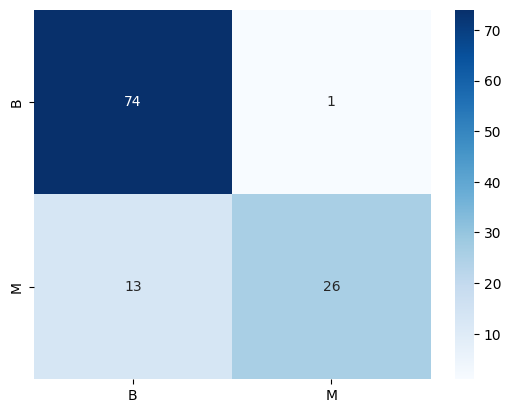

In [27]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'M'],
            yticklabels=['B', 'M'])

In [28]:
#Classification GaussianNB
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[74  1]
 [ 6 33]]
------------------------------------------
------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.93      0.99      0.95        75
           M       0.97      0.85      0.90        39

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



<Axes: >

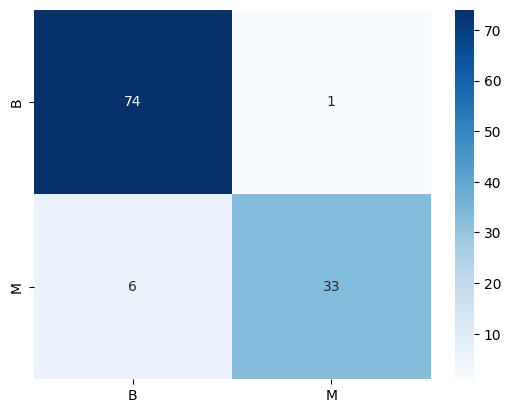

In [29]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'M'],
            yticklabels=['B', 'M'])

In [30]:
#Classification BernoulliNB

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB().fit(X_train, y_train)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
#evaluation of classifier performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[75  0]
 [39  0]]
------------------------------------------
------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.66      1.00      0.79        75
           M       0.00      0.00      0.00        39

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Decision Tree for Breast Cancer Dataset**

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix:
[[73  2]
 [ 5 34]]
------------------------------------------
------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.94      0.97      0.95        75
           M       0.94      0.87      0.91        39

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



<Axes: >

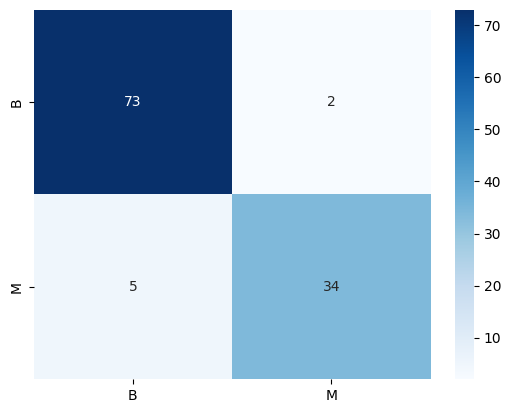

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'M'],
            yticklabels=['B', 'M'])

Confusion Matrix:
[[73  2]
 [ 5 34]]
------------------------------------------
------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           B       0.94      0.97      0.95        75
           M       0.94      0.87      0.91        39

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



<Axes: >

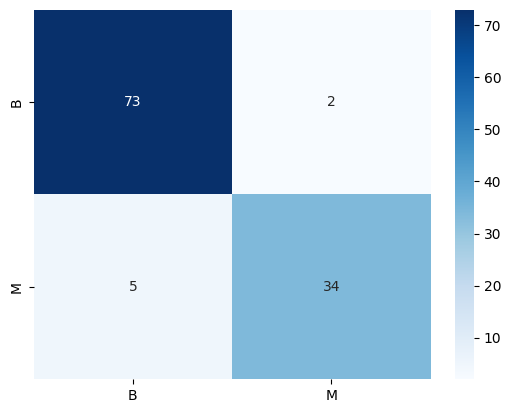

In [34]:
classifier = DecisionTreeClassifier(criterion="gini", max_depth=10)
classifier.fit(X_train, y_train)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------")
print("------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['B', 'M'],
            yticklabels=['B', 'M'])

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import plot_tree

In [36]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_23 <= 884.55
|   |--- feature_27 <= 0.16
|   |   |--- feature_27 <= 0.11
|   |   |   |--- feature_13 <= 48.98
|   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |--- class: B
|   |   |   |--- feature_13 >  48.98
|   |   |   |   |--- feature_11 <= 1.94
|   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_11 >  1.94
|   |   |   |   |   |--- class: M
|   |   |--- feature_27 >  0.11
|   |   |   |--- feature_9 <= 0.06
|   |   |   |   |--- class: M
|   |   |   |--- feature_9 >  0.06
|   |   |   |   |--- feature_21 <= 33.76
|   |   |   |   |   |--- feature_22 <= 115.60
|   |   |   |   |   |   |--- feature_18 <= 0.01
|   |   |   |   |   |   |   |--- feature_21 <= 17.53
|   |   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |   |--- feature_21 

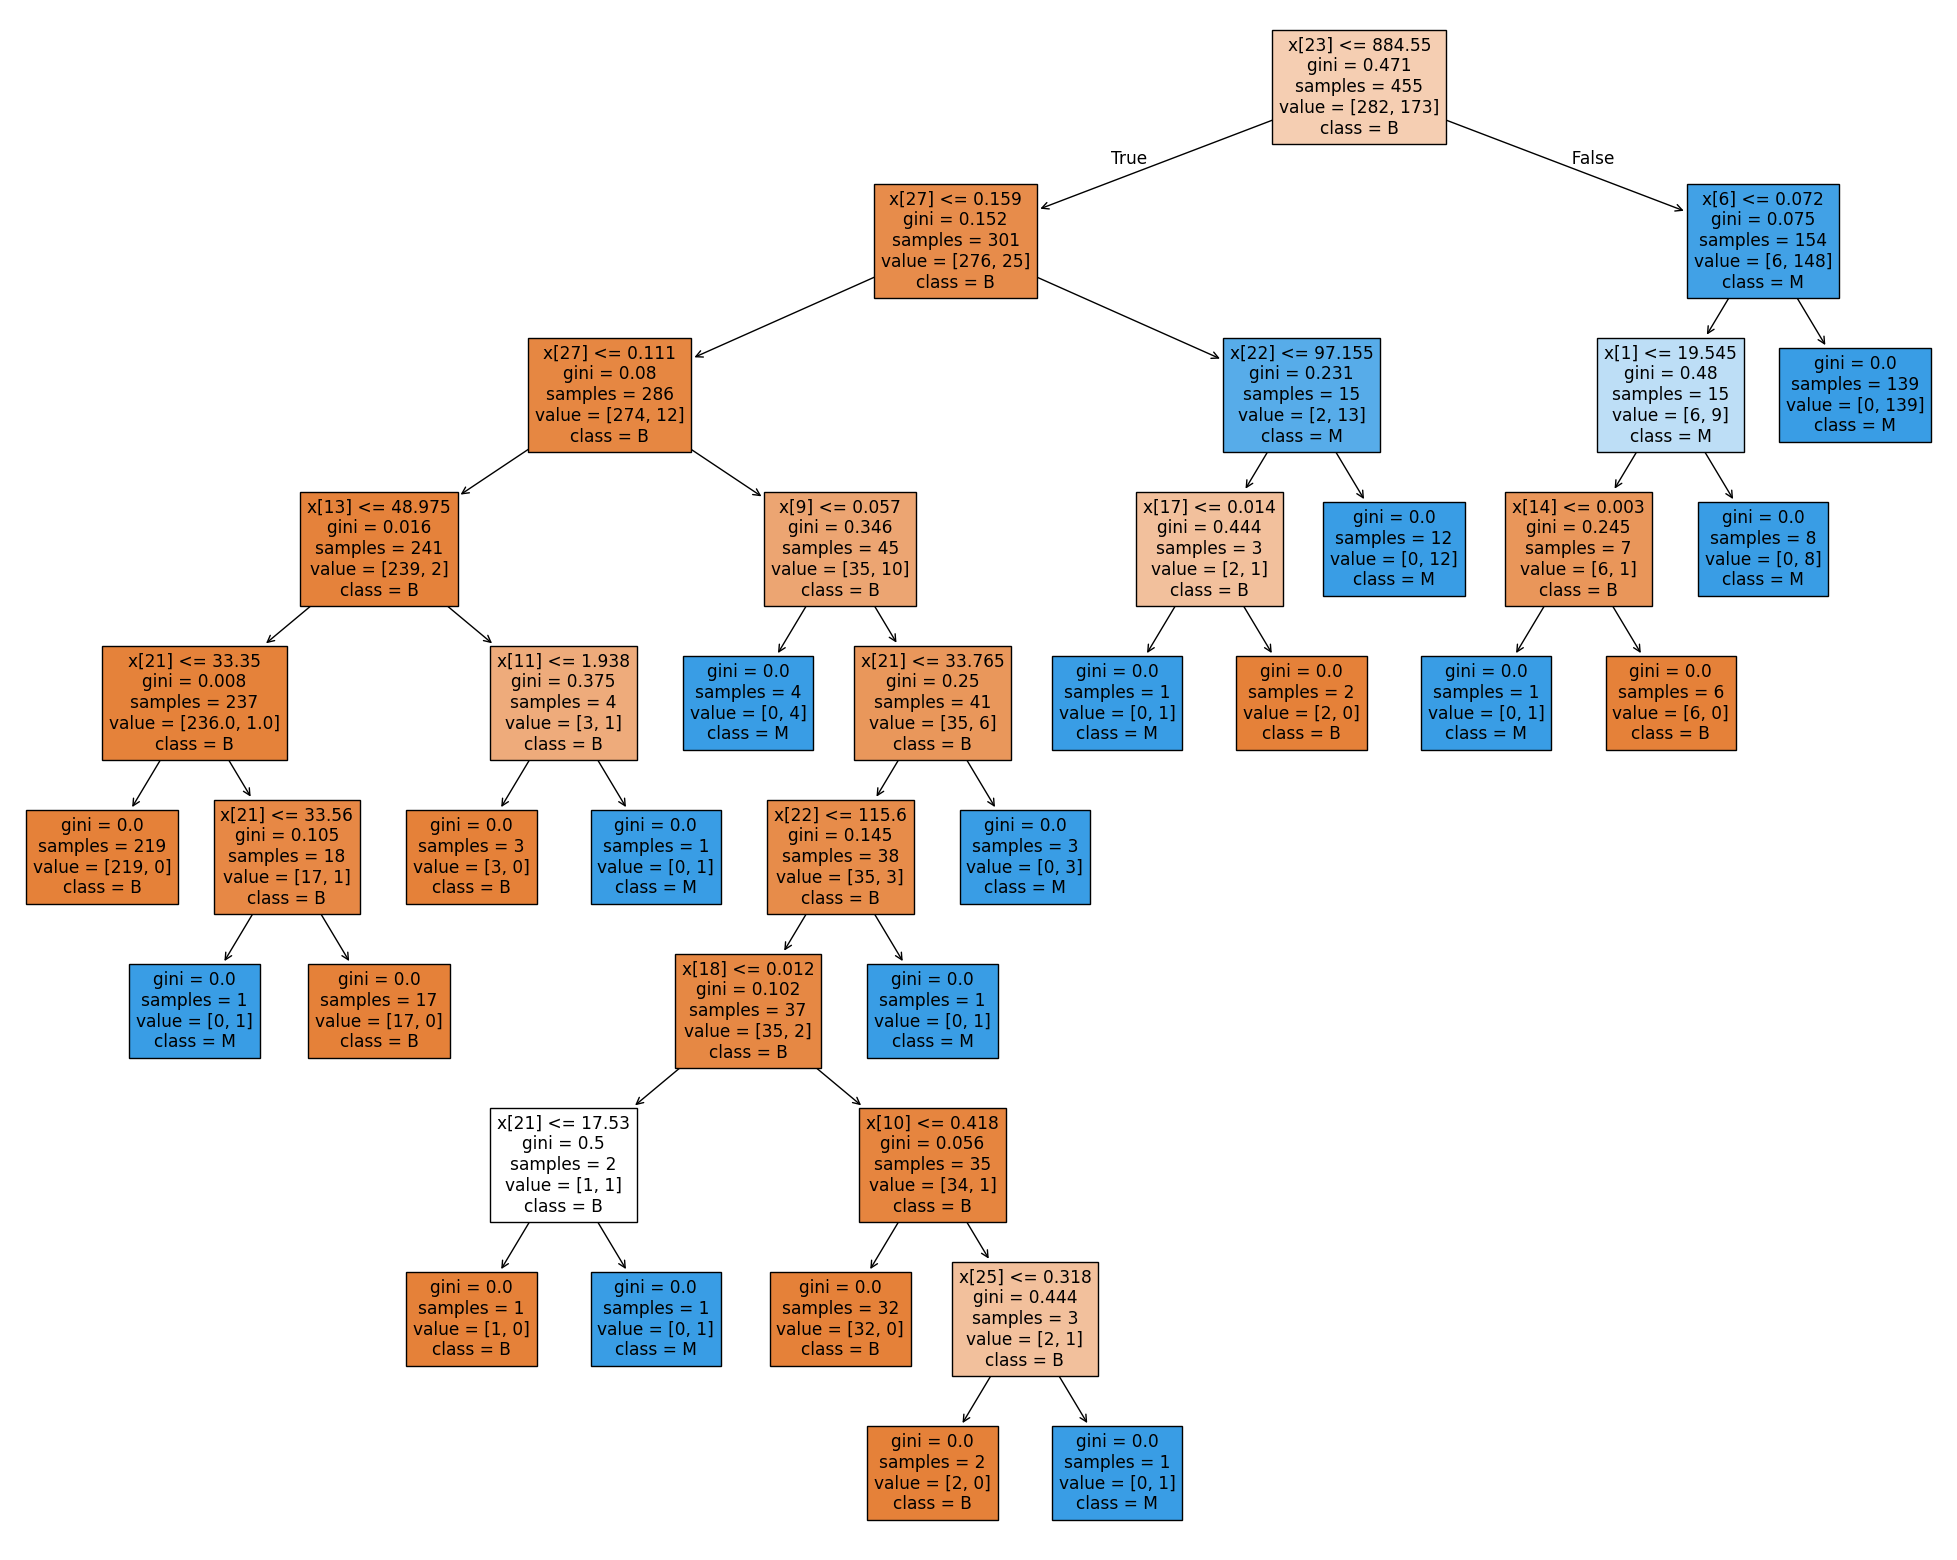

In [37]:
#Visualising the graph without the use of graphviz

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree=classifier,
                   feature_names=breast_cancer_wisconsin_diagnostic.columns,
                   class_names=["B", "M"],
                   filled=True)
